<div style="padding-bottom:30px">
<a href="http://iqtk.io"><img src="https://discover.iqtk.io/assets/logotype_blue_small.png" style="width:100px; margin-left:0px"></img></a>
<p style="color:#9E9E9E">
<a href="http://iqtk.io">Getting Started Guide</a> // <a href="https://goo.gl/forms/2cOmuUrQ3n3CKpim1">Documentation Feedback</a></p>
</div>

<h1 style="color:#9E9E9E">Genotype analysis with Samtools</h1>

In this analysis we use Samtools to make genotype calls for a sample of interest. Read more about [Samtools](http://samtools.sourceforge.net/) or [genotyping in general](https://en.wikipedia.org/wiki/Genotyping).

There is some background reading so once you've completed the [getting started documentation]() you'll be ready for this tutorial!

<h2 style="color:#9E9E9E">Required Data and Parameterization</h2>

The starting point for this workflow is the following:

<ul style="font-size:15px">
<ol><b>1. Reference FASTA:</b> GCS path to reference genome assembly in FASTA format (aginst which to align reads).</ol>
<ol><b>2. Sequence reads:</b> GCS path to file listing input reads.</ol>
</ul>

Each of these should be present on Google Cloud Storage. A cloud storage containing FASTQ base calls for a transcriptome sequencing run on the MiSeq sequencer is shown below.

<img src="https://discover.iqtk.io/assets/miseq-sync-1.png" style="padding:20px; max-height:400px"></img>

The screenshot above is of data synced to cloud storage using the `iqtk uplink` utility for sending instrument data to cloud storage as it is generated. [Read more](https://github.com/iqtk/iqtk) about deploying the `uplink` utility at your site. Next we discuss two of the following three ways workflows can be triggered.

<ul style="font-size:15px">
<ol>1. Using the `iqtk` command-line tool</ol>
<ol>2. Programmatically in response to an instrument data sync event.</ol>

</ul>

<h3 style="color:#9E9E9E">Parameterization from the command-line</h2>

Initiating workflow runs from the command line requires that the `iqtk` utility is installed on your system (such as via `pip install iqtk`) and that you have authenticated with GCP to access the APIs and file objects referenced by and required for your run. Provided these, a workflow can be initiated using the following command provided a JSON config file like the one following that.

In [ ]:
%%bash
iqtk run genotype --config=path_to_your_config.json

```json
{
  "debug": true,
  "local": false,
  "cloud": true,
  "ref_fasta": "gs://iqtk/dmel/bwa/genome.fa",
  "reads": [
    ["gs://iqtk/rnaseq/GSM794483_C1_R1_1_small.fq",
     "gs://iqtk/rnaseq/GSM794483_C1_R1_2_small.fq"]
   ]
}

```

Once our job is submitted we'll be able to check its status using the Cloud DataFow UI (as described in the [getting started documentation]()) which should look like the following:

<img src="https://discover.iqtk.io/assets/wf-sshot-gatk-genotyper.png" style="padding:20px; max-height:700px"></img>

For the interested you can check out the full code for this workflow [here](https://github.com/iqtk/iqtk/blob/master/inquiry/toolkit/genotyper_gatk/operations.py).

<h2 style="color:#9E9E9E">Exploring the data</h2>

When the workflow is complete you can obtain the path in Google Cloud Storage to the resulting files as described in the [getting started documentation](). Workflow runs produce raw data as well as BigQuery database entries. We can explore the latter through the BigQuery UI, provided the project, dataset, and table destination provided in our input. This should look like the following:

<img src="https://discover.iqtk.io/assets/bq-sshot-genotyper-gatk.png" style="padding:20px; max-height:400px"></img>

Next we'll pull down a subset of this data from BigQuery into a Pandas data_frame permitting further exploratory and interactive usage.

In [34]:
import google.datalab.bigquery as bq
query = bq.Query('SELECT * FROM `jbei-cloud.demonstration.variants3` LIMIT 3')
output_options = bq.QueryOutput.table(use_cache=False)
result = query.execute(output_options=output_options).result()
result.to_dataframe()

,id,refname,start,end,refbases,altbases,quality,filter,info,format
0,.,2L,18327,None,T,"[<, *, >]",None,.,"DP=17;I16=15,2,0,0,680,27200,0,0,423,11439,0,0...",PL
1,.,2L,10936,None,T,"[<, *, >]",None,.,"DP=32;I16=20,12,0,0,1276,50896,0,0,1920,115200...",PL
2,.,2L,9858,None,T,"[<, *, >]",None,.,"DP=30;I16=27,0,0,0,1200,57600,0,0,1620,97200,0...",PL


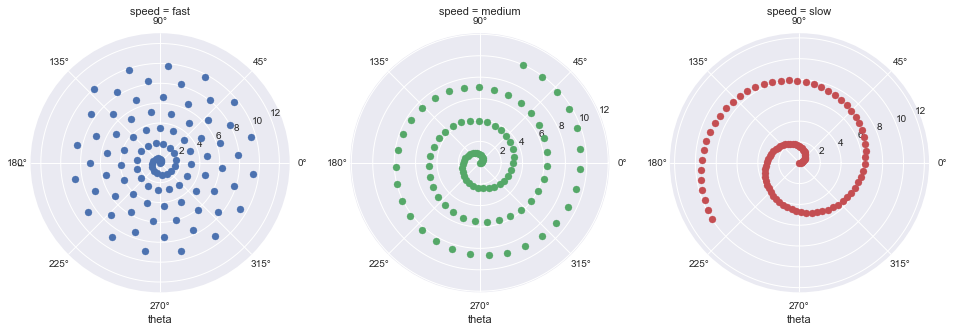

In [5]:
# TODO: At this point, we can do anything that can be done with a pandas dataframe. For example:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), size=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(plt.scatter, "theta", "r")

<h3 style="color:#9E9E9E">References</h3>

1. Li, Heng, et al. "The sequence alignment/map format and SAMtools." Bioinformatics 25.16 (2009): 2078-2079.
2. Li, Heng, and Richard Durbin. "Fast and accurate short read alignment with Burrows–Wheeler transform." Bioinformatics 25.14 (2009): 1754-1760.
3. Li, Heng. "Aligning sequence reads, clone sequences and assembly contigs with BWA-MEM." arXiv preprint arXiv:1303.3997 (2013).

<h3 style="color:#9E9E9E">Contact</h3>

Want to get in touch? You can [provide feedback](https://goo.gl/forms/2cOmuUrQ3n3CKpim1) regarding this or other documentation,
[reach out to us](https://goo.gl/forms/j8FWdNJqABAoJvcW2) regarding collaboration, or [request a new feature or analytical capability](https://goo.gl/forms/dQm3SDcoNZsV7AAd2). We're looking forward to hearing from you!

<div style="padding-top: 30px">
<p style="color:#9E9E9E; text-align:center">This notebook was prepared as part of the <a href="https://github.com/iqtk/iqtk">Inquiry Toolkit</a> project at the Joint BioEnergy Institute (JBEI). Learn more at https://www.jbei.org/.</p>
<p style="color:#9E9E9E; text-align:center">The Joint BioEnergy Institute is a program of the U.S. Department of Energy Office of Science.</p>
<p style="color:#9E9E9E; text-align:center">© Regents of the University of California, 2017. Licensed under a BSD-3 <a href="https://github.com/iqtk/iqtk/blob/master/LICENSE">license</a>.</p>
<img src="https://discover.iqtk.io/assets/logotype_blue_small.png" style="width:100px"></img>
</div>